In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import os, glob
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import scipy.fftpack
import scipy.stats

In [2]:
file_path = r'D:\Stations_data\Stations_data\Bansathi\Bansathi_all_months_copy'
os.chdir(file_path)

In [3]:
df1 = pd.read_csv('Bansathi_all.csv', sep = ',') #arse_dates = 'date')

df1['date'] = pd.to_datetime(df1.date, format = '%d.%m.%Y %H:%M:%S')
df1.set_index('date', inplace = True)
df1_1hr = df1.resample('60min').mean()
df1_1day = df1.resample('1440min').mean()

In [4]:
df2 = pd.read_csv('Rainfall_data_new.csv', sep = ',')
df2['Date & Time'] = pd.to_datetime(df2['Date & Time'])#, format = "%d/%m/%Y - %H:%M:%S")
df2 = df2.set_index('Date & Time')
df2_1hr = df2.resample('60min').mean()
df2_1hr = df2_1hr.fillna(0.0)
df2_1hr.shape

(7998, 3)

In [5]:
df3 = pd.read_csv('Temp_Rain_Bansathi.csv', sep = ',')
df3['Date & Time'] = pd.to_datetime(df3['Date & Time'], format = "%d/%m/%Y - %H:%M:%S")
df3 = df3.set_index('Date & Time')
df3_1hr = df3.resample('60min').mean()
# df3_1hr.head()

In [6]:
# # Pre-Monsoon
# date_mask1 = (df1_1hr.index >= '2020-04-11') & (df1_1hr.index < '2020-04-17')
# date_mask2 = (df2_1hr.index >= '2020-04-11') & (df2_1hr.index < '2020-04-17')
# date_mask3 = (df3_1hr.index >= '2020-04-11') & (df3_1hr.index < '2020-04-17')

# # Monsoon
# date_mask1 = (df1_1hr.index >= '2020-06-17') & (df1_1hr.index < '2020-06-24')
# date_mask2 = (df2_1hr.index >= '2020-06-17') & (df2_1hr.index < '2020-06-24')
# date_mask3 = (df3_1hr.index >= '2020-06-17') & (df3_1hr.index < '2020-06-24')

# Post-Monsoon
date_mask1 = (df1_1hr.index >= '2020-09-25') & (df1_1hr.index < '2020-10-01')
date_mask2 = (df2_1hr.index >= '2020-09-25') & (df2_1hr.index < '2020-10-01')
date_mask3 = (df3_1hr.index >= '2020-09-25') & (df3_1hr.index < '2020-10-01')

# # Winter
# date_mask1 = (df1_1hr.index >= '2020-12-24') & (df1_1hr.index < '2020-12-30')
# date_mask2 = (df2_1hr.index >= '2020-12-24') & (df2_1hr.index < '2020-12-30')
# date_mask3 = (df3_1hr.index >= '2020-12-24') & (df3_1hr.index < '2020-12-30')

In [7]:
dfs = [df1_1hr, df2_1hr, df3_1hr]

# Extracting the desired slice of Time-Series (Soil-Moisture)
SM_sensor1 = df1_1hr['S1SM'].loc[date_mask1]
SM_sensor2 = df1_1hr['S2SM'].loc[date_mask1]
SM_sensor3 = df1_1hr['S3SM'].loc[date_mask1]
SM_sensor4 = df1_1hr['S4SM'].loc[date_mask1]
SM_sensor5 = df1_1hr['S5SM'].loc[date_mask1]
SM_sensor6 = df1_1hr['S6SM'].loc[date_mask1]
SM_sensor7 = df1_1hr['S7SM'].loc[date_mask1]
SM_sensor8 = df1_1hr['S8SM'].loc[date_mask1]
SM_sensor9 = df1_1hr['S9SM'].loc[date_mask1]
SM_sensor10 = df1_1hr['S10SM'].loc[date_mask1]

# Extracting the desired slice of Time-Series (Soil-Temperature)
ST_sensor1 = df1_1hr['S1Temp'].loc[date_mask1]
ST_sensor2 = df1_1hr['S2Temp'].loc[date_mask1]
ST_sensor3 = df1_1hr['S3Temp'].loc[date_mask1]
ST_sensor4 = df1_1hr['S4Temp'].loc[date_mask1]
ST_sensor5 = df1_1hr['S5Temp'].loc[date_mask1]
ST_sensor6 = df1_1hr['S6Temp'].loc[date_mask1]
ST_sensor7 = df1_1hr['S7Temp'].loc[date_mask1]
ST_sensor8 = df1_1hr['S8Temp'].loc[date_mask1]
ST_sensor9 = df1_1hr['S9Temp'].loc[date_mask1]
ST_sensor10 = df1_1hr['S10Temp'].loc[date_mask1]

# Extracting the desired slice of Time-Series (Rain-Fall)
Rainfall = df2_1hr['Int_Rainfall (mm)'].loc[date_mask2]

# Extracting the desired slice of Time-Series (Air-Temperature)
Air_Temp = df3_1hr['Temp (0C)'].loc[date_mask3]

In [8]:
type(SM_sensor1)

pandas.core.series.Series

In [9]:
work_df = pd.concat([SM_sensor1, SM_sensor2, SM_sensor3, SM_sensor4, SM_sensor5, SM_sensor6, SM_sensor7,
                     SM_sensor8, SM_sensor9, SM_sensor10, ST_sensor1, ST_sensor2, ST_sensor3, ST_sensor4,
                    ST_sensor5, ST_sensor6, ST_sensor7, ST_sensor8, ST_sensor9, ST_sensor10, Rainfall, Air_Temp], axis = 1)
work_df.tail()

,S1SM,S2SM,S3SM,S4SM,S5SM,S6SM,S7SM,S8SM,S9SM,S10SM,...,S3Temp,S4Temp,S5Temp,S6Temp,S7Temp,S8Temp,S9Temp,S10Temp,Int_Rainfall (mm),Temp (0C)
date,,,,,,,,,,,,,,,,,,,,,
2020-09-30 19:00:00,7.560000,17.630000,20.946667,21.660000,6.346667,5.400000,11.576667,8.593333,3.655000,11.750000,...,29.880333,29.821833,33.402500,33.541667,31.324333,32.621167,30.522333,29.355500,0.0,26.7350
2020-09-30 20:00:00,7.551667,17.630000,20.945000,21.651667,6.328333,5.316667,11.550000,8.575000,3.660000,11.750000,...,29.880333,29.822833,32.915167,32.829333,30.989500,32.349000,29.949167,29.369667,0.0,25.6775
2020-09-30 21:00:00,7.550000,17.628333,20.950000,21.648333,6.315000,5.248333,11.538333,8.563333,3.673333,11.750000,...,29.886667,29.810000,32.446500,32.168167,30.636667,31.993500,29.434833,29.377667,0.0,24.6425
2020-09-30 22:00:00,7.550000,17.618000,20.950000,21.646000,6.304000,5.216000,11.540000,8.568000,3.690000,11.758000,...,29.912400,29.793800,31.962600,31.484200,30.248600,31.612600,28.906400,29.396600,0.0,23.8675
2020-09-30 23:00:00,7.545000,17.606667,20.950000,21.643333,6.301667,5.210000,11.540000,8.600000,3.698333,11.761667,...,29.935167,29.799500,31.541500,30.942500,29.932500,31.276000,28.500000,29.421833,0.0,24.0000


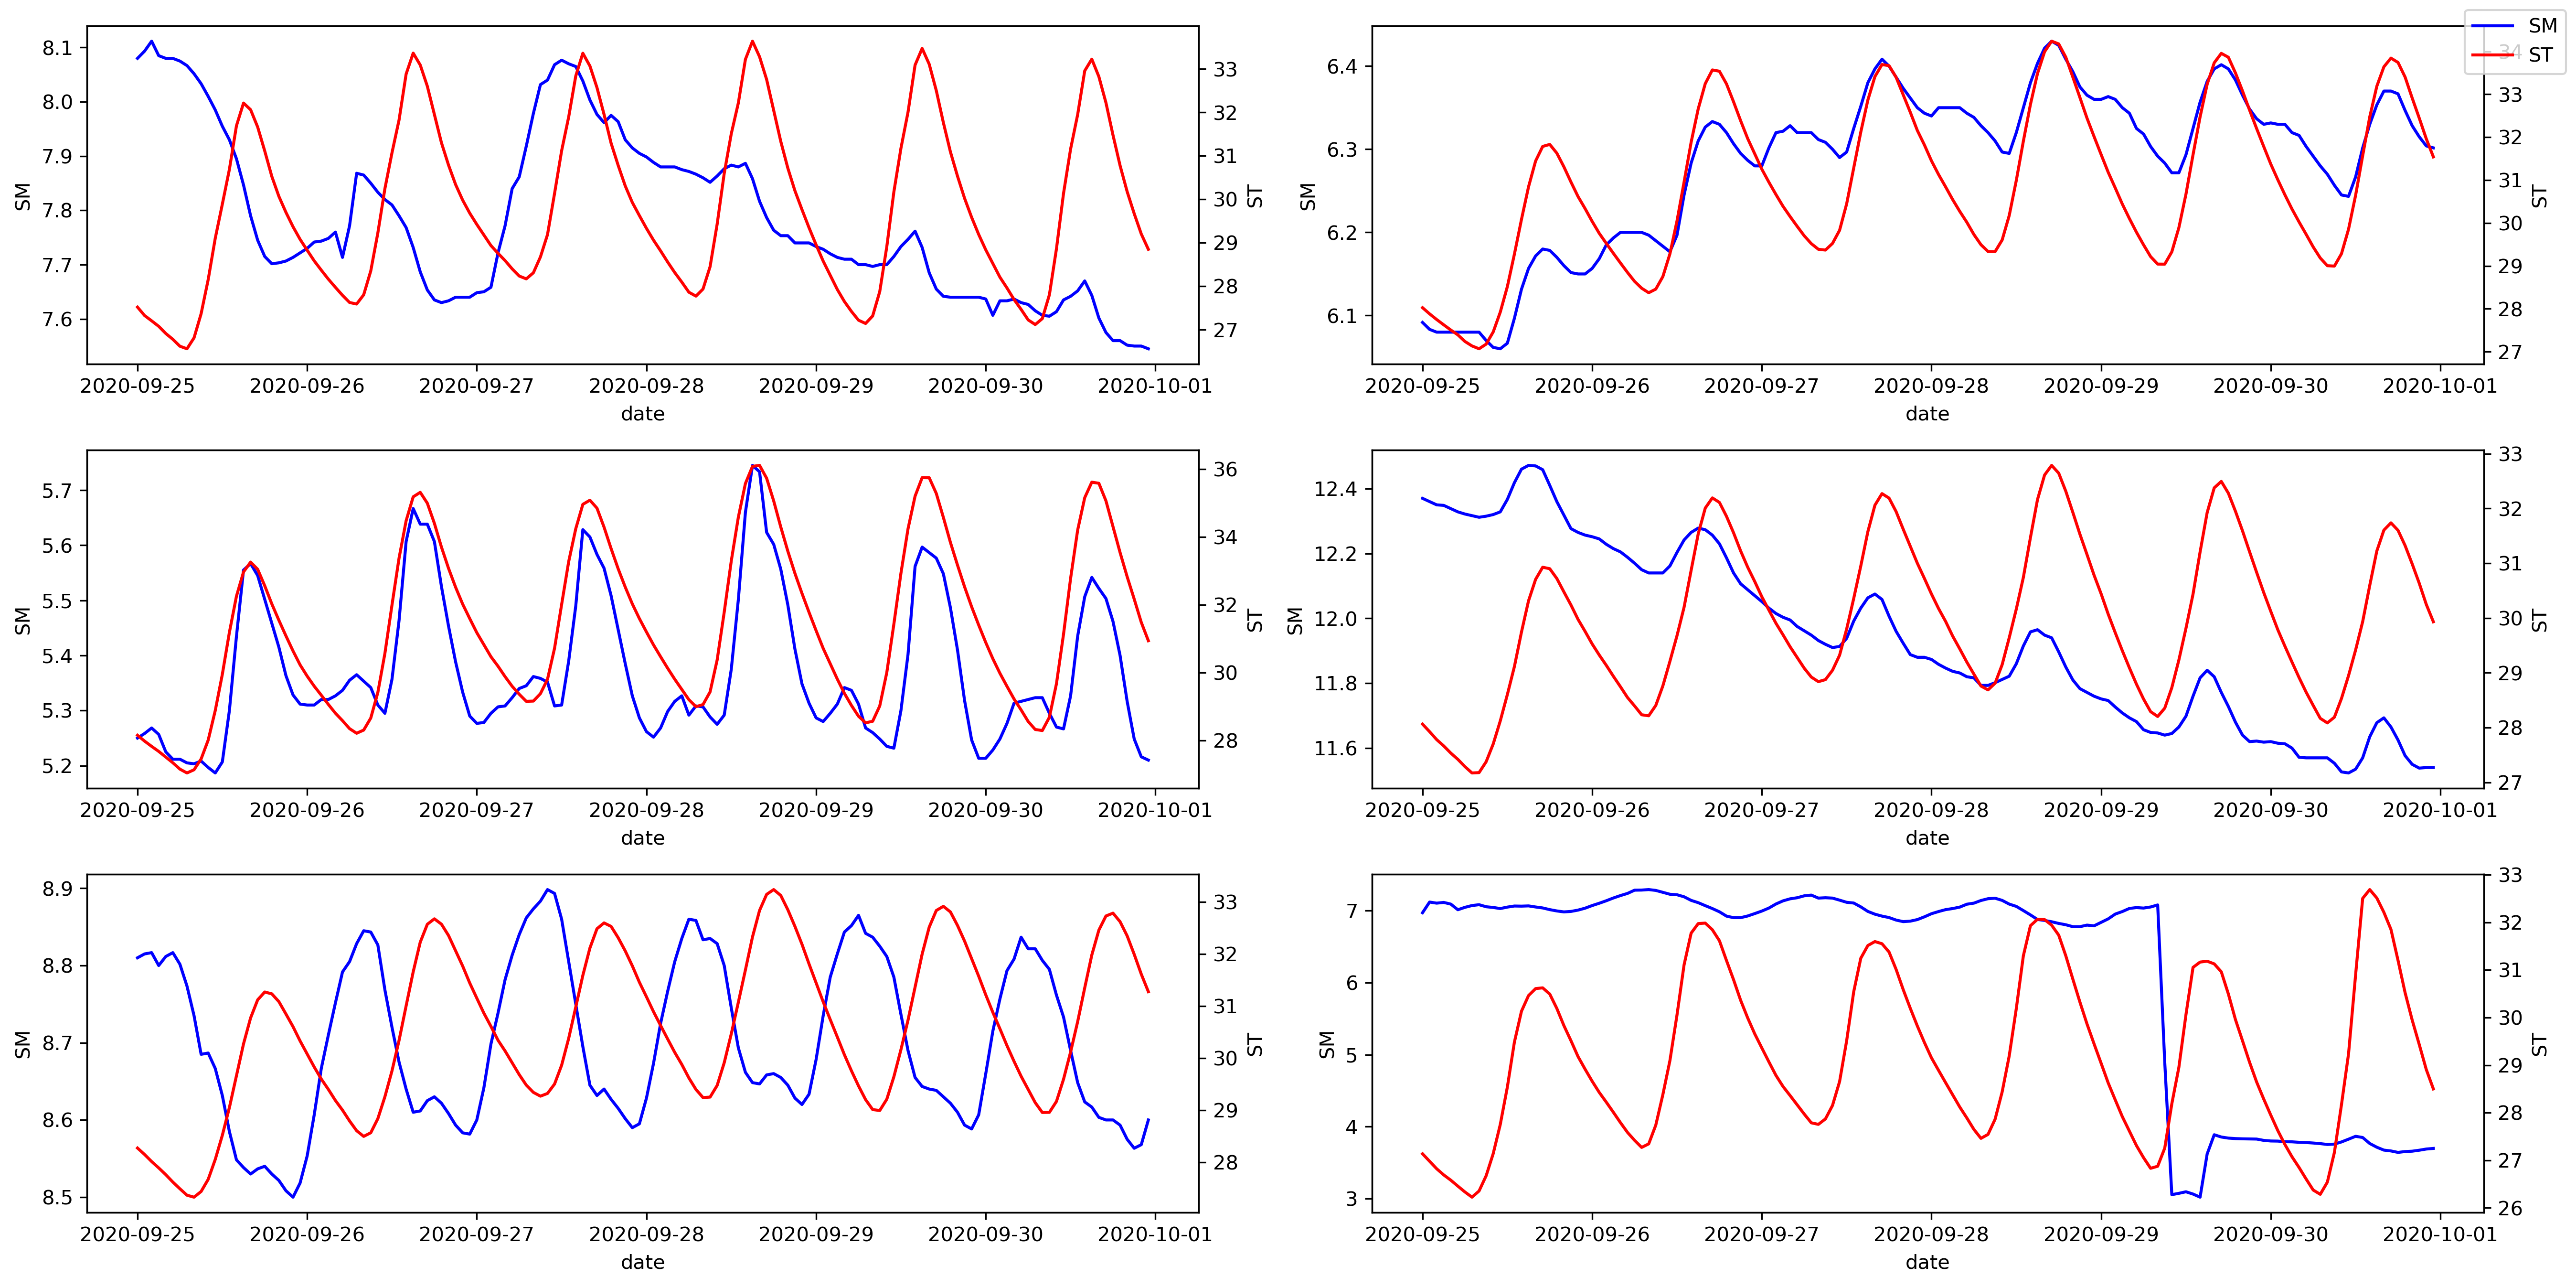

In [10]:
fg, ax = plt.subplots(3, 2, figsize=(9*2, 4*2.25), dpi=300)
ac1 = ax[0,0].twinx()
ax[0,0].plot(work_df.index, work_df.S1SM,'b' , label = 'SM')
ax[0,0].set(xlabel = 'date', ylabel = 'SM')
ac1.set(xlabel = 'date', ylabel = 'ST')
ac1.plot(work_df.index, work_df.S1Temp,'r' , label = 'ST')

ac2 = ax[0,1].twinx()
ax[0,1].plot(work_df.index, work_df.S5SM,'b')
ax[0,1].set(xlabel = 'date', ylabel = 'SM')
ac2.set(xlabel = 'date', ylabel = 'ST')
ac2.plot(work_df.index, work_df.S5Temp,'r' )

ac3 = ax[1,0].twinx()
ax[1,0].plot(work_df.index, work_df.S6SM,'b')
ax[1,0].set(xlabel = 'date', ylabel = 'SM')
ac3.set(xlabel = 'date', ylabel = 'ST')
ac3.plot(work_df.index, work_df.S6Temp,'r')

ac4 = ax[1,1].twinx()
ax[1,1].plot(work_df.index, work_df.S7SM,'b')
ax[1,1].set(xlabel = 'date', ylabel = 'SM')
ac4.set(xlabel = 'date', ylabel = 'ST')
ac4.plot(work_df.index, work_df.S7Temp,'r')

ac5 = ax[2,0].twinx()
ax[2,0].plot(work_df.index, work_df.S8SM,'b')
ax[2,0].set(xlabel = 'date', ylabel = 'SM')
ac5.set(xlabel = 'date', ylabel = 'ST')
ac5.plot(work_df.index, work_df.S8Temp,'r')

ac6 = ax[2,1].twinx()
ax[2,1].plot(work_df.index, work_df.S9SM,'b')
ax[2,1].set(xlabel = 'date', ylabel = 'SM')
ac6.set(xlabel = 'date', ylabel = 'ST')
ac6.plot(work_df.index, work_df.S9Temp,'r' )

plt.tight_layout()
fg.legend();


In [11]:
max_S1SM_hour= SM_sensor1.groupby(pd.Grouper(freq='D')).idxmax()
max_S2SM_hour= SM_sensor2.groupby(pd.Grouper(freq='D')).idxmax()
max_S3SM_hour= SM_sensor3.groupby(pd.Grouper(freq='D')).idxmax()
max_S4SM_hour= SM_sensor4.groupby(pd.Grouper(freq='D')).idxmax()
max_S5SM_hour= SM_sensor5.groupby(pd.Grouper(freq='D')).idxmax()
max_S6SM_hour= SM_sensor6.groupby(pd.Grouper(freq='D')).idxmax()
max_S7SM_hour= SM_sensor7.groupby(pd.Grouper(freq='D')).idxmax()
max_S8SM_hour= SM_sensor8.groupby(pd.Grouper(freq='D')).idxmax()
max_S9SM_hour= SM_sensor9.groupby(pd.Grouper(freq='D')).idxmax()
max_S10SM_hour= SM_sensor10.groupby(pd.Grouper(freq='D')).idxmax()

max_S1ST_hour= ST_sensor1.groupby(pd.Grouper(freq='D')).idxmax()
max_S2ST_hour= ST_sensor2.groupby(pd.Grouper(freq='D')).idxmax()
max_S3ST_hour= ST_sensor3.groupby(pd.Grouper(freq='D')).idxmax()
max_S4ST_hour= ST_sensor4.groupby(pd.Grouper(freq='D')).idxmax()
max_S5ST_hour= ST_sensor5.groupby(pd.Grouper(freq='D')).idxmax()
max_S6ST_hour= ST_sensor6.groupby(pd.Grouper(freq='D')).idxmax()
max_S7ST_hour= ST_sensor7.groupby(pd.Grouper(freq='D')).idxmax()
max_S8ST_hour= ST_sensor8.groupby(pd.Grouper(freq='D')).idxmax()
max_S9ST_hour= ST_sensor9.groupby(pd.Grouper(freq='D')).idxmax()
max_S10ST_hour= ST_sensor10.groupby(pd.Grouper(freq='D')).idxmax()
max_AirT_hour= Air_Temp.groupby(pd.Grouper(freq='D')).idxmax()

In [12]:
SM_sensor1 = SM_sensor1.interpolate(method= 'quadratic')
SM_sensor2 = SM_sensor2.interpolate(method= 'quadratic')
SM_sensor3 = SM_sensor3.interpolate(method= 'quadratic')
SM_sensor4 = SM_sensor4.interpolate(method= 'quadratic')
SM_sensor5 = SM_sensor5.interpolate(method= 'quadratic')
SM_sensor6 = SM_sensor6.interpolate(method= 'quadratic')
SM_sensor7 = SM_sensor7.interpolate(method= 'quadratic')
SM_sensor8 = SM_sensor8.interpolate(method= 'quadratic')
SM_sensor9 = SM_sensor9.interpolate(method= 'quadratic')
SM_sensor10 = SM_sensor10.interpolate(method= 'quadratic')

ST_sensor1 = ST_sensor1.interpolate(method= 'quadratic')
ST_sensor2 = ST_sensor2.interpolate(method= 'quadratic')
ST_sensor3 = ST_sensor3.interpolate(method= 'quadratic')
ST_sensor4 = ST_sensor4.interpolate(method= 'quadratic')
ST_sensor5 = ST_sensor5.interpolate(method= 'quadratic')
ST_sensor6 = ST_sensor6.interpolate(method= 'quadratic')
ST_sensor7 = ST_sensor7.interpolate(method= 'quadratic')
ST_sensor8 = ST_sensor8.interpolate(method= 'quadratic')
ST_sensor9 = ST_sensor9.interpolate(method= 'quadratic')
ST_sensor10 = ST_sensor10.interpolate(method= 'quadratic')

In [14]:
covariance1 = np.cov(SM_sensor1, ST_sensor1)
covariance2 = np.cov(SM_sensor2, ST_sensor2)
covariance3 = np.cov(SM_sensor3, ST_sensor3)
covariance4 = np.cov(SM_sensor4, ST_sensor4)
covariance5 = np.cov(SM_sensor5, ST_sensor5)
covariance6 = np.cov(SM_sensor6, ST_sensor6)
covariance7 = np.cov(SM_sensor7, ST_sensor7)
covariance8 = np.cov(SM_sensor8, ST_sensor8)
covariance9 = np.cov(SM_sensor9, ST_sensor9)
covariance10 = np.cov(SM_sensor10, ST_sensor10)

In [15]:
print(covariance1)
print(covariance2)
print(covariance3)
print(covariance4)
print(covariance5)
print(covariance6)
print(covariance7)
print(covariance8)
print(covariance9)
print(covariance10)

[[ 0.02286478 -0.0367413 ]
 [-0.0367413   3.75364425]]
[[ 0.0223945  -0.00360216]
 [-0.00360216  0.2299316 ]]
[[0.01454026 0.00334175]
 [0.00334175 0.01086428]]
[[0.02367844 0.01835816]
 [0.01835816 0.02249429]]
[[0.00918634 0.13569958]
 [0.13569958 3.50564531]]
[[0.0170503  0.26614617]
 [0.26614617 6.07207923]]
[[ 0.07530477 -0.0499202 ]
 [-0.0499202   2.0054367 ]]
[[ 0.01105964 -0.10337598]
 [-0.10337598  2.28550279]]
[[ 2.248938   -0.25534383]
 [-0.25534383  3.00010734]]
[[ 6.87152157e-02 -5.80840909e-05]
 [-5.80840909e-05  7.74436400e-03]]


In [ ]:
## Soil Temperature and air temperature lag

# Temperature lags
# T_S1_lag = max_S1ST_hour - max_AirT_hour
# T_S5_lag = max_S5ST_hour - max_AirT_hour
# T_S6_lag = max_S6ST_hour - max_AirT_hour
# T_S7_lag = max_S7ST_hour - max_AirT_hour
# T_S8_lag = max_S8ST_hour - max_AirT_hour
# T_S9_lag = max_S9ST_hour - max_AirT_hour

#Temperature and moisture lags
# SMT_S1_lag = max_S1ST_hour - max_S1SM_hour
# SMT_S5_lag = max_S5ST_hour - max_S5SM_hour
# SMT_S6_lag = max_S6ST_hour - max_S6SM_hour
# SMT_S7_lag = max_S7ST_hour - max_S7SM_hour
# SMT_S8_lag = max_S8ST_hour - max_S8SM_hour
# SMT_S9_lag = max_S9ST_hour - max_S9SM_hour

In [ ]:
fg, ax = plt.subplots(3, 2, figsize=(9*2, 4*2.25), dpi=300)
ac1 = ax[0,0].twinx()
ax[0,0].plot(SM_sensor1,'b' , label = 'SM')
ax[0,0].set(xlabel = 'date', ylabel = 'SM')
ac1.set(xlabel = 'date', ylabel = 'ST')
ac1.plot(ST_sensor1,'r' , label = 'ST')

ac2 = ax[0,1].twinx()
ax[0,1].plot(SM_sensor5,'b')
ax[0,1].set(xlabel = 'date', ylabel = 'SM')
ac2.set(xlabel = 'date', ylabel = 'ST')
ac2.plot(ST_sensor5,'r' )

ac3 = ax[1,0].twinx()
ax[1,0].plot(SM_sensor6,'b')
ax[1,0].set(xlabel = 'date', ylabel = 'SM')
ac3.set(xlabel = 'date', ylabel = 'ST')
ac3.plot(ST_sensor6,'r')

ac4 = ax[1,1].twinx()
ax[1,1].plot(SM_sensor7,'b')
ax[1,1].set(xlabel = 'date', ylabel = 'SM')
ac4.set(xlabel = 'date', ylabel = 'ST')
ac4.plot(ST_sensor7,'r')

ac5 = ax[2,0].twinx()
ax[2,0].plot(SM_sensor8,'b')
ax[2,0].set(xlabel = 'date', ylabel = 'SM')
ac5.set(xlabel = 'date', ylabel = 'ST')
ac5.plot(ST_sensor8,'r')

ac6 = ax[2,1].twinx()
ax[2,1].plot(SM_sensor9,'b')
ax[2,1].set(xlabel = 'date', ylabel = 'SM')
ac6.set(xlabel = 'date', ylabel = 'ST')
ac6.plot(ST_sensor9,'r' )

plt.tight_layout()
fg.legend();


In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

print('-#-#-#-#-#-#-#-#-#-# { Soil Moisture} #-#-#-#-#-#-#-#-#-#-')
# Null - Hypothesis test for Sensor-1 Soil Moisture
print('############ Sensor - 1 ############')
S1_SM = SM_sensor1
result_S1_SM = adfuller(S1_SM)
print('ADF Statistics: %f' % result_S1_SM[0])
print('p-value: %f' % result_S1_SM[1])
print('Critical Values:')
for key, value in result_S1_SM[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result_S1_SM[0] < result_S1_SM[4]["5%"]:
    print("Reject Ho - Time Series is Stationary")
else:
    print("Failed to Reject Ho - Time Series is Non-Stationary")
    
    
# Null - Hypothesis test for Sensor-5 Soil Moisture
print('############ Sensor - 5 ############')
S5_SM = SM_sensor5
result_S5_SM = adfuller(S5_SM)
print('ADF Statistics: %f' % result_S5_SM[0])
print('p-value: %f' % result_S5_SM[1])
print('Critical Values:')
for key, value in result_S5_SM[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result_S5_SM[0] < result_S5_SM[4]["5%"]:
    print("Reject Ho - Time Series is Stationary")
else:
    print("Failed to Reject Ho - Time Series is Non-Stationary")
    
# Null - Hypothesis test for Sensor-6 Soil Moisture
print('############ Sensor - 6 ############')
# S6_SM = SM_sensor6
# result_S6_SM = adfuller(S6_SM)
# print('ADF Statistics: %f' % result_S6_SM[0])
# print('p-value: %f' % result_S6_SM[1])
# print('Critical Values:')
# for key, value in result_S6_SM[4].items():
#     print('\t%s: %.3f' % (key, value))
    
# if result_S6_SM[0] < result_S6_SM[4]["5%"]:
#     print("Reject Ho - Time Series is Stationary")
# else:
#     print("Failed to Reject Ho - Time Series is Non-Stationary")
    
# Null - Hypothesis test for Sensor-7 Soil Moisture
print('############ Sensor - 7 ############')
# S7_SM = SM_sensor7
# result_S7_SM = adfuller(S7_SM)
# print('ADF Statistics: %f' % result_S7_SM[0])
# print('p-value: %f' % result_S7_SM[1])
# print('Critical Values:')
# for key, value in result_S7_SM[4].items():
#     print('\t%s: %.3f' % (key, value))
    
# if result_S7_SM[0] < result_S7_SM[4]["5%"]:
#     print("Reject Ho - Time Series is Stationary")
# else:
#     print("Failed to Reject Ho - Time Series is Non-Stationary")
    
# Null - Hypothesis test for Sensor-8 Soil Moisture
print('############ Sensor - 8 ############')
# S8_SM = SM_sensor8
# result_S8_SM = adfuller(S8_SM)
# print('ADF Statistics: %f' % result_S8_SM[0])
# print('p-value: %f' % result_S8_SM[1])
# print('Critical Values:')
# for key, value in result_S8_SM[4].items():
#     print('\t%s: %.3f' % (key, value))
    
# if result_S8_SM[0] < result_S8_SM[4]["5%"]:
#     print("Reject Ho - Time Series is Stationary")
# else:
#     print("Failed to Reject Ho - Time Series is Non-Stationary")
    
# Null - Hypothesis test for Sensor-9 Soil Moisture
print('############ Sensor - 9 ############')
# S9_SM = SM_sensor9
# result_S9_SM = adfuller(S9_SM)
# print('ADF Statistics: %f' % result_S9_SM[0])
# print('p-value: %f' % result_S9_SM[1])
# print('Critical Values:')
# for key, value in result_S9_SM[4].items():
#     print('\t%s: %.3f' % (key, value))
    
# if result_S9_SM[0] < result_S9_SM[4]["5%"]:
#     print("Reject Ho - Time Series is Stationary")
# else:
#     print("Failed to Reject Ho - Time Series is Non-Stationary")

In [ ]:
# Null - Hypothesis test for Sensor-1 Soil Moisture
print('-#-#-#-#-#-#-#-#-#-# { Soil Temperature} #-#-#-#-#-#-#-#-#-#-')
print('############ Sensor - 1 ############')
S1_ST = ST_sensor1.values
result_S1_ST = adfuller(S1_ST)
print('ADF Statistics: %f' % result_S1_ST[0])
print('p-value: %f' % result_S1_ST[1])
print('Critical Values:')
for key, value in result_S1_ST[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result_S1_ST[0] < result_S1_ST[4]["5%"]:
    print("Reject Ho - Time Series is Stationary")
else:
    print("Failed to Reject Ho - Time Series is Non-Stationary")
    
    
# Null - Hypothesis test for Sensor-5 Soil Moisture
print('############ Sensor - 5 ############')
S5_ST = ST_sensor5.values
result_S5_ST = adfuller(S5_ST)
print('ADF Statistics: %f' % result_S5_ST[0])
print('p-value: %f' % result_S5_ST[1])
print('Critical Values:')
for key, value in result_S5_ST[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result_S5_ST[0] < result_S5_ST[4]["5%"]:
    print("Reject Ho - Time Series is Stationary")
else:
    print("Failed to Reject Ho - Time Series is Non-Stationary")
    
# Null - Hypothesis test for Sensor-6 Soil Moisture
print('############ Sensor - 6 ############')
# S6_ST = ST_sensor6.values
# result_S6_ST = adfuller(S6_ST)
# print('ADF Statistics: %f' % result_S6_ST[0])
# print('p-value: %f' % result_S6_ST[1])
# print('Critical Values:')
# for key, value in result_S6_ST[4].items():
#     print('\t%s: %.3f' % (key, value))
    
# if result_S6_ST[0] < result_S6_ST[4]["5%"]:
#     print("Reject Ho - Time Series is Stationary")
# else:
#     print("Failed to Reject Ho - Time Series is Non-Stationary")
    
# Null - Hypothesis test for Sensor-7 Soil Moisture
print('############ Sensor - 7 ############')
# S7_ST = ST_sensor7.values
# result_S7_ST = adfuller(S7_ST)
# print('ADF Statistics: %f' % result_S7_ST[0])
# print('p-value: %f' % result_S7_ST[1])
# print('Critical Values:')
# for key, value in result_S7_ST[4].items():
#     print('\t%s: %.3f' % (key, value))
    
# if result_S7_ST[0] < result_S7_ST[4]["5%"]:
#     print("Reject Ho - Time Series is Stationary")
# else:
#     print("Failed to Reject Ho - Time Series is Non-Stationary")
    
# Null - Hypothesis test for Sensor-8 Soil Moisture
print('############ Sensor - 8 ############')
# S8_ST = ST_sensor8.values
# result_S8_ST = adfuller(S8_ST)
# print('ADF Statistics: %f' % result_S8_ST[0])
# print('p-value: %f' % result_S8_ST[1])
# print('Critical Values:')
# for key, value in result_S8_ST[4].items():
#     print('\t%s: %.3f' % (key, value))
    
# if result_S8_ST[0] < result_S8_ST[4]["5%"]:
#     print("Reject Ho - Time Series is Stationary")
# else:
#     print("Failed to Reject Ho - Time Series is Non-Stationary")
    
# Null - Hypothesis test for Sensor-9 Soil Moisture
print('############ Sensor - 9 ############')
# S9_ST = ST_sensor9.values
# result_S9_ST = adfuller(S9_ST)
# print('ADF Statistics: %f' % result_S9_ST[0])
# print('p-value: %f' % result_S9_ST[1])
# print('Critical Values:')
# for key, value in result_S9_ST[4].items():
#     print('\t%s: %.3f' % (key, value))
    
# if result_S9_ST[0] < result_S9_ST[4]["5%"]:
#     print("Reject Ho - Time Series is Stationary")
# else:
#     print("Failed to Reject Ho - Time Series is Non-Stationary")

## Stationarity check after first order differencing

In [ ]:
# Differencing to make the Non-stationary time-series into stationaty

# def differncing ():
#     for i in 
print('-#-#-#-#-#-#-#-#-#-# { Soil Moisture} #-#-#-#-#-#-#-#-#-#-')
print('############ Sensor - 1 ############')
S1_SM_Diff = np.diff(SM_sensor1)
# plt.plot(S1_SM_Diff)
len(S1_SM_Diff)

# S1_SM = SM_sensor1.values
result_S1_SM = adfuller(S1_SM_Diff)
print('ADF Statistics: %f' % result_S1_SM[0])
print('p-value: %f' % result_S1_SM[1])
print('Critical Values:')
for key, value in result_S1_SM[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result_S1_SM[0] < result_S1_SM[4]["5%"]:
    print("Reject Ho - Time Series is Stationary")
else:
    print("Failed to Reject Ho - Time Series is Non-Stationary")
    
print('############ Sensor - 5 ############')
S5_SM_Diff = np.diff(SM_sensor5)
len(S5_SM_Diff)

# S1_SM = SM_sensor1.values
result_S5_SM = adfuller(S5_SM_Diff)
print('ADF Statistics: %f' % result_S5_SM[0])
print('p-value: %f' % result_S5_SM[1])
print('Critical Values:')
for key, value in result_S5_SM[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result_S5_SM[0] < result_S5_SM[4]["5%"]:
    print("Reject Ho - Time Series is Stationary")
else:
    print("Failed to Reject Ho - Time Series is Non-Stationary")
    
print('############ Sensor - 6 ############')
S6_SM_Diff = np.diff(SM_sensor6)
len(S6_SM_Diff)

# S1_SM = SM_sensor1.values
result_S6_SM = adfuller(S6_SM_Diff)
print('ADF Statistics: %f' % result_S6_SM[0])
print('p-value: %f' % result_S6_SM[1])
print('Critical Values:')
for key, value in result_S6_SM[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result_S6_SM[0] < result_S6_SM[4]["5%"]:
    print("Reject Ho - Time Series is Stationary")
else:
    print("Failed to Reject Ho - Time Series is Non-Stationary")
    
print('############ Sensor - 7 ############')
S7_SM_Diff = np.diff(SM_sensor7)
len(S7_SM_Diff)

# S1_SM = SM_sensor1.values
result_S7_SM = adfuller(S7_SM_Diff)
print('ADF Statistics: %f' % result_S7_SM[0])
print('p-value: %f' % result_S7_SM[1])
print('Critical Values:')
for key, value in result_S7_SM[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result_S7_SM[0] < result_S7_SM[4]["5%"]:
    print("Reject Ho - Time Series is Stationary")
else:
    print("Failed to Reject Ho - Time Series is Non-Stationary")
    
print('############ Sensor - 8 ############')
S8_SM_Diff = np.diff(SM_sensor8)
len(S8_SM_Diff)

# S1_SM = SM_sensor1.values
result_S8_SM = adfuller(S8_SM_Diff)
print('ADF Statistics: %f' % result_S8_SM[0])
print('p-value: %f' % result_S8_SM[1])
print('Critical Values:')
for key, value in result_S8_SM[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result_S8_SM[0] < result_S8_SM[4]["5%"]:
    print("Reject Ho - Time Series is Stationary")
else:
    print("Failed to Reject Ho - Time Series is Non-Stationary")
    
print('############ Sensor - 9 ############')
S9_SM_Diff = np.diff(SM_sensor9)
len(S9_SM_Diff)

# S1_SM = SM_sensor1.values
result_S9_SM = adfuller(S9_SM_Diff)
print('ADF Statistics: %f' % result_S9_SM[0])
print('p-value: %f' % result_S9_SM[1])
print('Critical Values:')
for key, value in result_S9_SM[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result_S9_SM[0] < result_S9_SM[4]["5%"]:
    print("Reject Ho - Time Series is Stationary")
else:
    print("Failed to Reject Ho - Time Series is Non-Stationary")
    
fig, ax = plt.subplots(3, 2, figsize = (9*2, 4*2.3), dpi = 300)

ax[0,0].plot(S1_SM_Diff, 'green', label = 'SM after differencing')
ax[0,0].set(title='S1', ylabel = 'soil moisture')

ax[0,1].plot(S5_SM_Diff, 'green')
ax[0,1].set(title='S5', ylabel = 'soil moisture')

ax[1,0].plot(S6_SM_Diff, 'green')
ax[1,0].set(title='S6', ylabel = 'soil moisture')

ax[1,1].plot(S7_SM_Diff, 'green')
ax[1,1].set(title='S7', ylabel = 'soil moisture')

ax[2,0].plot(S8_SM_Diff, 'green')
ax[2,0].set(title='S8', ylabel = 'soil moisture')

ax[2,1].plot(S9_SM_Diff, 'green')
ax[2,1].set(title='S9', ylabel = 'soil moisture')
fig.legend(loc = 'upper center')
plt.tight_layout()
fig.show()

In [ ]:
fig, ax = plt.subplots(2, 1, figsize = (4*2, 4*2.2), dpi = 300)

ax[0].plot(SM_sensor1, 'blue', label = 'SM before')
ax[1].plot(S1_SM_Diff, 'b--', label = 'SM after')
ax[0].set(title='Before Differencing', ylabel = 'soil moisture')
ax[1].set(title='After Differencing', ylabel = 'soil moisture')
ax[1].set_xlabel('Time-series')
plt.tight_layout()
fig.legend();

In [ ]:
# Differencing to make the Non-stationary time-series into stationaty

# def differncing ():
#     for i in 
print('-#-#-#-#-#-#-#-#-#-# { Soil Temperature} #-#-#-#-#-#-#-#-#-#-')
print('############ Sensor - 1 ############')
S1_ST_Diff = np.diff(ST_sensor1)
len(S1_ST_Diff)

result_S1_ST = adfuller(S1_ST_Diff)
print('ADF Statistics: %f' % result_S1_ST[0])
print('p-value: %f' % result_S1_ST[1])
print('Critical Values:')
for key, value in result_S1_ST[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result_S1_ST[0] < result_S1_ST[4]["5%"]:
    print("Reject Ho - Time Series is Stationary")
else:
    print("Failed to Reject Ho - Time Series is Non-Stationary")
    
print('############ Sensor - 5 ############')
S5_ST_Diff = np.diff(ST_sensor5)
len(S5_ST_Diff)

result_S5_ST = adfuller(S5_ST_Diff)
print('ADF Statistics: %f' % result_S5_ST[0])
print('p-value: %f' % result_S5_ST[1])
print('Critical Values:')
for key, value in result_S5_ST[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result_S5_ST[0] < result_S5_ST[4]["5%"]:
    print("Reject Ho - Time Series is Stationary")
else:
    print("Failed to Reject Ho - Time Series is Non-Stationary")
    
print('############ Sensor - 6 ############')
S6_ST_Diff = np.diff(ST_sensor6)
len(S6_ST_Diff)

result_S6_ST = adfuller(S6_ST_Diff)
print('ADF Statistics: %f' % result_S6_ST[0])
print('p-value: %f' % result_S6_ST[1])
print('Critical Values:')
for key, value in result_S6_ST[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result_S6_ST[0] < result_S6_ST[4]["5%"]:
    print("Reject Ho - Time Series is Stationary")
else:
    print("Failed to Reject Ho - Time Series is Non-Stationary")
    
print('############ Sensor - 7 ############')
S7_ST_Diff = np.diff(ST_sensor7)
len(S7_ST_Diff)

result_S7_ST = adfuller(S7_ST_Diff)
print('ADF Statistics: %f' % result_S7_ST[0])
print('p-value: %f' % result_S7_ST[1])
print('Critical Values:')
for key, value in result_S7_ST[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result_S7_ST[0] < result_S7_ST[4]["5%"]:
    print("Reject Ho - Time Series is Stationary")
else:
    print("Failed to Reject Ho - Time Series is Non-Stationary")
    
print('############ Sensor - 8 ############')
S8_ST_Diff = np.diff(ST_sensor8)
len(S8_ST_Diff)

result_S8_ST = adfuller(S8_ST_Diff)
print('ADF Statistics: %f' % result_S8_ST[0])
print('p-value: %f' % result_S8_ST[1])
print('Critical Values:')
for key, value in result_S8_ST[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result_S8_ST[0] < result_S8_ST[4]["5%"]:
    print("Reject Ho - Time Series is Stationary")
else:
    print("Failed to Reject Ho - Time Series is Non-Stationary")
    
print('############ Sensor - 9 ############')
S9_ST_Diff = np.diff(ST_sensor9)
len(S9_ST_Diff)

result_S9_ST = adfuller(S9_ST_Diff)
print('ADF Statistics: %f' % result_S9_ST[0])
print('p-value: %f' % result_S9_ST[1])
print('Critical Values:')
for key, value in result_S9_ST[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result_S9_ST[0] < result_S9_ST[4]["5%"]:
    print("Reject Ho - Time Series is Stationary")
else:
    print("Failed to Reject Ho - Time Series is Non-Stationary")
    
fig, ax = plt.subplots(3, 2, figsize = (9*2, 4*2.3), dpi = 300)

ax[0,0].plot(S1_ST_Diff, 'green', label = 'ST after differencing')
ax[0,0].set(title='S1', ylabel = 'soil temp.')

ax[0,1].plot(S5_ST_Diff, 'green')
ax[0,1].set(title='S5', ylabel = 'soil temp.')

# ax[1,0].plot(S6_ST_Diff, 'green')
# ax[1,0].set(title='S6', ylabel = 'soil temp.')

# ax[1,1].plot(S7_ST_Diff, 'green')
# ax[1,1].set(title='S7', ylabel = 'soil temp.')

# ax[2,0].plot(S8_ST_Diff, 'green')
# ax[2,0].set(title='S8', ylabel = 'soil temp.')

# ax[2,1].plot(S9_ST_Diff, 'green')
# ax[2,1].set(title='S9', ylabel = 'soil temp.')
fig.legend(loc = 'upper center')
plt.tight_layout()
fig.show()

In [ ]:
# Time lagged cross correlation

def crosscorr (datax, datay, lag=0, wrap = False):
    """
    Lag-N Cross correlaton.
    Shifted data filled with NaNs
    
    Parameters
    --------
    lag : int, default 0
    dataX, datay : pandas.Series objects of equal length
    
    
    Returns
    --------
    crosscorr : float
    """
    if wrap:
        shiftedy = datay.shift(lag)
        shiftedy.iloc[:lag] = datay.iloc[-lag:].values
        return datax.corr(shiftedy)
    else:
        return datax.corr(datay.shift(lag))
    
S1_d1 = pd.Series(S1_SM_Diff)
S1_d2 = pd.Series(S1_ST_Diff)

S5_d1 = pd.Series(S5_SM_Diff)
S5_d2 = pd.Series(S5_ST_Diff)

S6_d1 = pd.Series(S6_SM_Diff)
S6_d2 = pd.Series(S6_ST_Diff)

S7_d1 = pd.Series(S7_SM_Diff)
S7_d2 = pd.Series(S7_ST_Diff)

S8_d1 = pd.Series(S8_SM_Diff)
S8_d2 = pd.Series(S8_ST_Diff)

S9_d1 = pd.Series(S9_SM_Diff)
S9_d2 = pd.Series(S9_ST_Diff)


S1_rs = [crosscorr(S1_d1, S1_d2, lag) for lag in range(0,24)]
S5_rs = [crosscorr(S5_d1, S5_d2, lag) for lag in range(0,24)]
S6_rs = [crosscorr(S6_d1, S6_d2, lag) for lag in range(0,24)]
S7_rs = [crosscorr(S7_d1, S7_d2, lag) for lag in range(0,24)]
S8_rs = [crosscorr(S8_d1, S8_d2, lag) for lag in range(0,24)]
S9_rs = [crosscorr(S9_d1, S9_d2, lag) for lag in range(0,24)]

S1_offset = np.argmax(S1_rs)
S5_offset = np.argmax(S5_rs)
S6_offset = np.argmax(S6_rs)
S7_offset = np.argmax(S7_rs)
S8_offset = np.argmax(S8_rs)
S9_offset = np.argmax(S9_rs)

fig, ax = plt.subplots(3,2, figsize = (9*2, 5*2), dpi = 300)
ax[0,0].plot(S1_rs, label = 'Prearson Correlation Coeff.')
ax[0,0].axvline(np.argmax(S1_rs), color='r', linestyle='--', label = 'Peak synchrony')
ax[0,0].set(title=f'S1 \n Offset = {S1_offset} Hours \n SM leads <> ST leads', xlabel = 'Time-lag (Hours)',
            ylabel = 'Pearson r')
ax[0,0].set_xticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24])
ax[0,0].set_xticklabels([0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24])

ax[0,1].plot(S5_rs)
ax[0,1].axvline(np.argmax(S5_rs), color='r', linestyle='--')
ax[0,1].set(title=f'S5 \n Offset = {S5_offset} Hours \n SM leads <> ST leads', xlabel = 'Time-lag (Hours)', ylabel = 'Pearson r')
ax[0,1].set_xticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24])
ax[0,1].set_xticklabels([0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24])

ax[1,0].plot(S6_rs)
ax[1,0].axvline(np.argmax(S6_rs), color='r', linestyle='--')
ax[1,0].set(title=f'S6 \n Offset = {S6_offset} Hours \n SM leads <> ST leads', xlabel = 'Time-lag (Hours)', ylabel = 'Pearson r')
ax[1,0].set_xticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24])
ax[1,0].set_xticklabels([0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24])

ax[1,1].plot(S7_rs)
ax[1,1].axvline(np.argmax(S7_rs), color='r', linestyle='--')
ax[1,1].set(title=f'S7 \n Offset = {S7_offset} Hours \n SM leads <> ST leads', xlabel = 'Time-lag (Hours)', ylabel = 'Pearson r')
ax[1,1].set_xticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24])
ax[1,1].set_xticklabels([0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24])

ax[2,0].plot(S8_rs, label = '')
ax[2,0].axvline(np.argmax(S8_rs), color='r', linestyle='--')
ax[2,0].set(title=f'S8 \n Offset = {S8_offset} Hours \n SM leads <> ST leads', xlabel = 'Time-lag (Hours)', ylabel = 'Pearson r')
ax[2,0].set_xticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24])
ax[2,0].set_xticklabels([0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24])

ax[2,1].plot(S9_rs)
ax[2,1].axvline(np.argmax(S9_rs), color='r', linestyle='--')
ax[2,1].set(title=f'S9 \n Offset = {S9_offset} Hours \n SM leads <> ST leads', xlabel = 'Time-lag (Hours)', ylabel = 'Pearson r')
ax[2,1].set_xticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24])
ax[2,1].set_xticklabels([0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24])
plt.tight_layout()
# handles, labels = fig.get_legend_handles_labels()
fig.legend(loc = 'lower center');

In [ ]:
fig, ax = plt.subplots(3,1, figsize = (9, 9), dpi = 300)
ax[0].plot(S1_rs, label = 'Prearson Correlation Coeff.')
ax[0].axvline(np.floor(len(S1_rs)/2), color = 'k', linestyle='-', label = 'Center')
ax[0].axvline(np.argmax(S1_rs), color='r', linestyle='--', label = 'Peak synchrony')
ax[0].set(title=f'S1 \n Offset = {S1_offset} Hours \n SM leads <> ST leads', xlabel = 'Time-lag (Hours)',
            ylabel = 'Pearson r')
ax[0].set_xticks([0, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48])
ax[0].set_xticklabels([24, 20, 16, 12, 8, 4, 0, -4, -8, -12, -16, -20, -24])

ax[1].plot(S5_rs)
ax[1].axvline(np.floor(len(S5_rs)/2), color = 'k', linestyle='-')
ax[1].axvline(np.argmax(S5_rs), color='r', linestyle='--')
ax[1].set(title=f'S5 \n Offset = {S5_offset} Hours \n SM leads <> ST leads', xlabel = 'Time-lag (Hours)', ylabel = 'Pearson r')
ax[1].set_xticks([0, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48])
ax[1].set_xticklabels([24, 20, 16, 12, 8, 4, 0, -4, -8, -12, -16, -20, -24])

# ax[2].plot(S7_rs)
# ax[2].axvline(np.floor(len(S7_rs)/2), color = 'k', linestyle='-')
# ax[2].axvline(np.argmax(S7_rs), color='r', linestyle='--')
# ax[2].set(title=f'S7 \n Offset = {S7_offset} Hours \n SM leads <> ST leads', xlabel = 'Time-lag (Hours)', ylabel = 'Pearson r')
# ax[2].set_xticks([0, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48])
# ax[2].set_xticklabels([24, 20, 16, 12, 8, 4, 0, -4, -8, -12, -16, -20, -24])
fig.legend(loc = 'upper right')
plt.tight_layout();
# handles, labels = fig.get_legend_handles_labels();

In [ ]:
print('Maximum r values')
print('Sensor-1 max. rs value:', np.max(S1_rs))
print('Sensor-5 max. rs value:', np.max(S5_rs))
print('Sensor-6 max. rs value:', np.max(S6_rs))
print('Sensor-7 max. rs value:', np.max(S7_rs))
print('Sensor-8 max. rs value:', np.max(S8_rs))
print('Sensor-9 max. rs value:', np.max(S9_rs))

print('\n \n Maximum Time-lag')
print('Sensor-1 max. rs value:', (np.argmax(S1_rs)) - 24)
print('Sensor-5 max. rs value:', (np.argmax(S5_rs)) - 24)
print('Sensor-6 max. rs value:', (np.argmax(S6_rs)) - 24)
print('Sensor-7 max. rs value:', (np.argmax(S7_rs)) - 24)
print('Sensor-8 max. rs value:', (np.argmax(S8_rs)) - 24)
print('Sensor-9 max. rs value:', (np.argmax(S9_rs)) - 24)

In [ ]:
sns.regplot(SM_sensor1.values, ST_sensor1.values)

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
# cross coreelation using xcorr() function
ax1.xcorr(S1_d1, S1_d2, usevlines = True, maxlags=24, normed = True, lw = 2, color = 'k')

ax1.grid(True)
ax1.axhline(0, color = 'blue', lw=2)
plt.show()